Le Notebook suivant a pour but de présenter les résultats d'une analyse de données approfondies sur les données de régularité mensuelle des lignes SNCF par Région (https://data.sncf.com/explore/dataset/regularite-mensuelle-ter)

### Importation des bibliothèques nécessaires pour le travail d'analyse des données

In [1]:
from IPython.display import display, Markdown, Image
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Analyse des données sur l'année 2023

### 1) Importation des données

In [2]:
regularite_2023 = pd.read_csv('Data_SNCF/regularite-mensuelle-ter-2023.csv',sep=';',header=0)

In [3]:
regularite_2023

,Date,Région,Nombre de trains programmés,Nombre de trains ayant circulé,Nombre de trains annulés,Nombre de trains en retard à l'arrivée,Taux de régularité,Nombre de trains à l'heure pour un train en retard à l'arrivée,Commentaires
0,2013-01,Basse Normandie,3331.0,3297.0,34.0,311.0,90.567182,9.601286,Grand froid et épisode neigeux les semaines 3 ...
1,2013-01,Champagne Ardenne,6648.0,6595.0,53.0,334.0,94.935557,18.745509,Conditions météorologiques dégradées du 15 au ...
2,2013-01,Lorraine,NaN,NaN,NaN,NaN,NaN,NaN,Le Président de la Région Lorraine s'est oppos...
3,2013-02,Aquitaine,7926.0,7832.0,94.0,912.0,88.355465,7.587719,Inondations au sud de Dax du 11 au 13 février.
4,2013-02,Nord Pas de Calais,17478.0,17228.0,250.0,1040.0,93.963316,15.565385,Intempéries mi-février.
...,...,...,...,...,...,...,...,...,...
1963,2023-10,Nouvelle Aquitaine,17476.0,16936.0,540.0,2099.0,87.606282,7.068604,NaN
1964,2023-11,Normandie,9759.0,9356.0,403.0,1539.0,83.550663,5.079272,NaN
1965,2023-11,Occitanie,13254.0,12604.0,650.0,2079.0,83.505236,5.062530,NaN
1966,2023-12,Hauts-de-France,28622.0,27840.0,782.0,3055.0,89.026580,8.112930,NaN


In [4]:
regularite_2023.dtypes

Date                                                               object
Région                                                             object
Nombre de trains programmés                                       float64
Nombre de trains ayant circulé                                    float64
Nombre de trains annulés                                          float64
Nombre de trains en retard à l'arrivée                            float64
Taux de régularité                                                float64
Nombre de trains à l'heure pour un train en retard à l'arrivée    float64
Commentaires                                                       object
dtype: object

Pour plus de facilité, nous allons renommer certaines colonnes du dataset

In [7]:
regularite_2023.rename(columns={'Nombre de trains programmés':'Nb_trains_programme',
                                'Nombre de trains ayant circulé':'Nb_trains_circule',
                               'Nombre de trains annulés':'Nb_trains_annulé',
                               'Nombre de trains en retard à l\'arrivée':'Nb_trains_retard',
                               'Taux de régularité':'Taux_regularite',
                               'Nombre de trains à l\'heure pour un train en retard à l\'arrivée':'Nb_intime_per_late'}, inplace=True)

### Inspection du dataset

Nous inspectons la qualité des données du dataset afin d'avoir un aperçu de sa fiabilité, notamment au niveau de ses valeurs manquantes

In [8]:
regularite_2023.isna().sum()

Date                       0
Région                     0
Nb_trains_programme       37
Nb_trains_circule         37
Nb_trains_annulé          37
Nb_trains_retard          37
Taux_regularite           37
Nb_intime_per_retard      37
Commentaires            1042
dtype: int64

Nous pouvons voir que si l'on ommet la colonne des commentaires, il semblerait qu'il manquerait 37 lignes entières de données. Nous vérifions que cette hypothèse soit juste avec la commande suivante, qui compte les lignes dont l'entièreté des valeurs ne sont pas renseignés.

In [11]:
ligne_null = regularite_2023.filter(like='Nb').isnull().all(axis=1).sum()
ligne_null

37

On compte le pourcentage de lignes affectés 

In [12]:
ligne_null/len(regularite_2023)

0.018800813008130083

Le pourcentage est d'environ 2% du dataset, nous pouvons potentiellement nous en passer. Cependant, nous allons tout de même regarder quelles sont les lieux et mois les plus affectés par ces valeurs manquantes

In [14]:
regularite_2023[regularite_2023['Nb_trains_programme'].isnull()].groupby(['Région']).size()

Région
Lorraine              35
Nord Pas de Calais     2
dtype: int64

In [15]:
regularite_2023.loc[2,'Commentaires']

"Le Président de la Région Lorraine s'est opposé, par courrier du 10 juillet 2013, à ce que SNCF transmette à l'AQST les données relatives aux trains TER lorrains en retard ou annulés, au motif qu'il n'a pas ''de visibilité sur les capacités des régions à poursuivre leurs missions d'autorité organisatrice des transports régionaux''."

### Métrique intéressante du dataset

<AxesSubplot:>

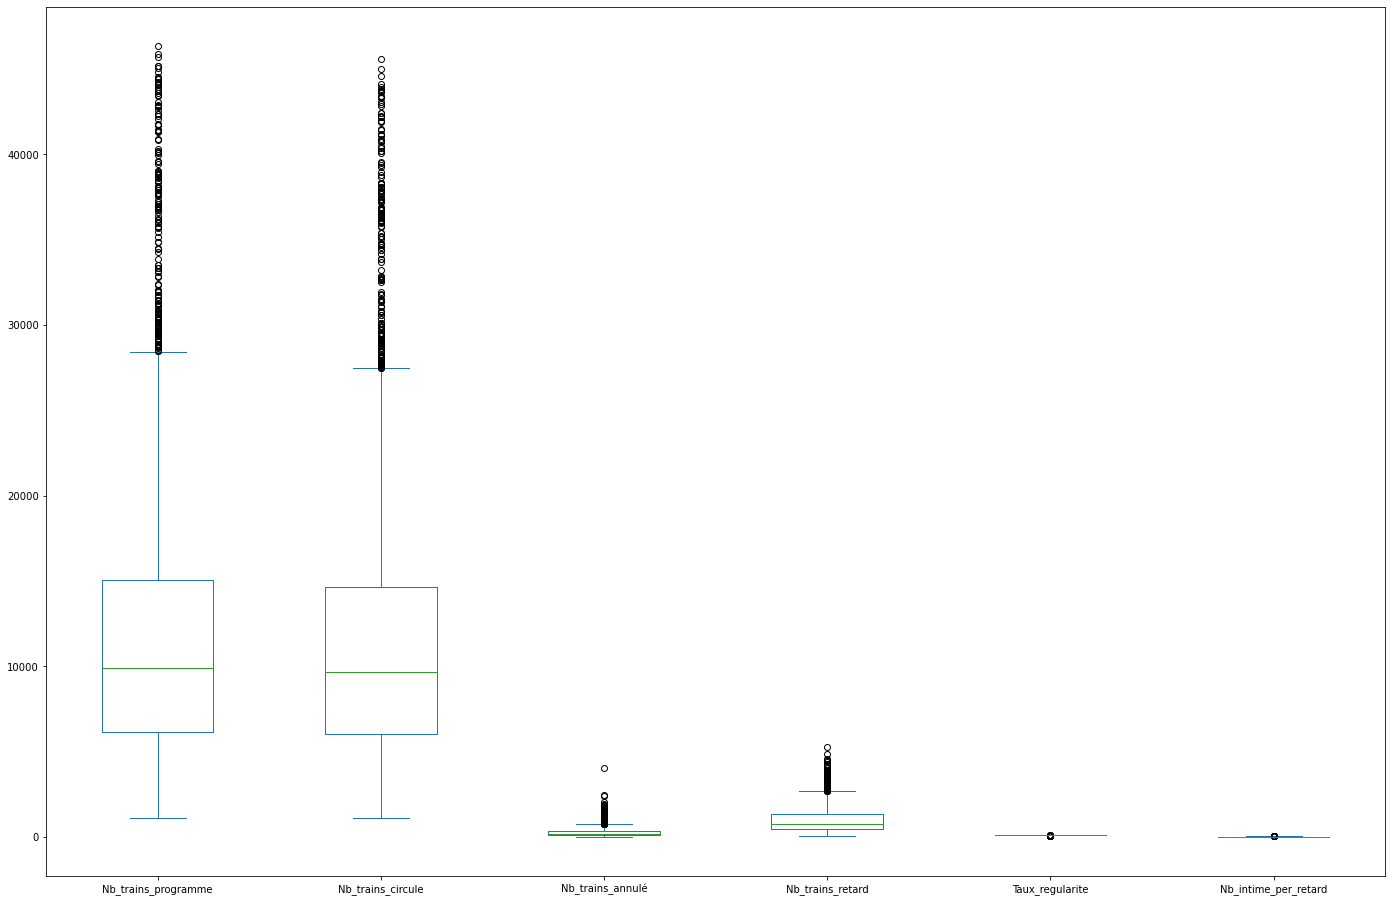

In [16]:
regularite_2023.plot.box(figsize=(24, 16))

In [17]:
pd.DataFrame(regularite_2023).describe()

,Nb_trains_programme,Nb_trains_circule,Nb_trains_annulé,Nb_trains_retard,Taux_regularite,Nb_intime_per_retard
count,1931.000000,1931.000000,1931.000000,1931.000000,1931.000000,1931.000000
mean,12740.312273,12470.675298,274.911963,1058.690316,91.512697,12.904506
std,9290.252366,9073.259509,306.188461,869.953684,3.410676,6.120747
min,1129.000000,1125.000000,4.000000,35.000000,74.365711,2.901025
25%,6143.500000,6038.500000,86.000000,443.500000,89.623887,8.637520
50%,9867.000000,9687.000000,167.000000,768.000000,91.970000,11.453300
75%,15068.000000,14616.000000,351.500000,1342.000000,94.056371,15.824738
max,46329.000000,45569.000000,4024.000000,5250.000000,98.026494,49.671233


Analyse du taux de ponctualité par région

In [18]:
for i in regularite_2023['Région'].unique().tolist():
    print("Taux de ponctualité pour la région " + i)
    df_reg=regularite_2023.loc[regularite_2023.Région == i].sort_values(by='Date')
    df_reg.dropna()
    colonne_train_en_retard = df_reg["Taux de régularité"]
    sns.lineplot(x='Date', y='Metric', hue='Region', data=df)
    plt.xlabel='Date'
    plt.xticks(rotation=90)
    plt.ylabel='Taux de régularité'
    plt.plot(df_reg.Date, colonne_train_en_retard)
    plt.show()

Taux de ponctualité pour la région Basse Normandie


KeyError: 'Taux de régularité'

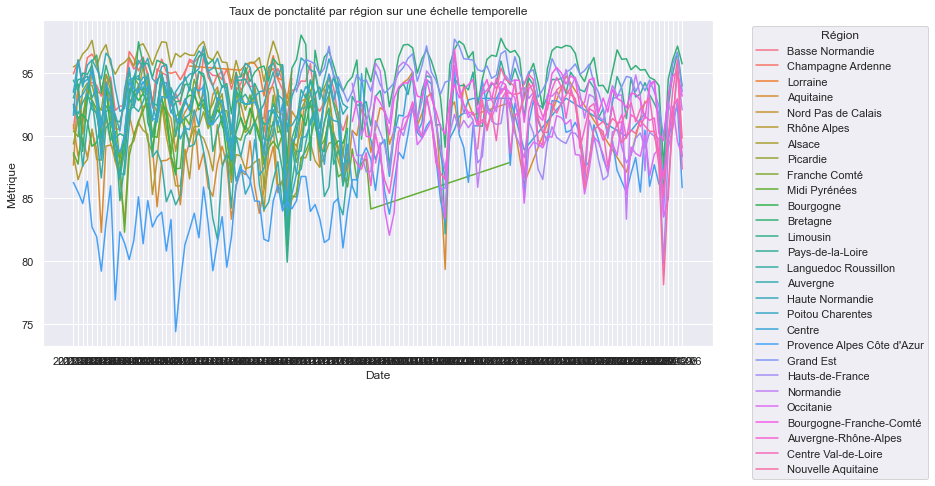

In [19]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

sns.lineplot(x='Date', y='Taux_regularite', hue='Région', data=regularite_2023)

# Personnaliser le graphique
plt.title('Taux de ponctalité par région sur une échelle temporelle')
plt.xlabel('Date')
plt.ylabel('Métrique')
plt.legend(title='Région', bbox_to_anchor=(1.05, 1), loc='upper left')

# Afficher le graphique
plt.show()

In [13]:
df_reg

,Date,Région,Nombre de trains programmés,Nombre de trains ayant circulé,Nombre de trains annulés,Nombre de trains en retard à l'arrivée,Taux de régularité,Nombre de trains à l'heure pour un train en retard à l'arrivée,Commentaires
1814,2020-09,Nouvelle Aquitaine,17171.0,16834.0,337.0,1490.0,91.148865,10.297987,NaN
1477,2020-10,Nouvelle Aquitaine,17425.0,16974.0,451.0,1878.0,88.940000,8.041591,NaN
1489,2020-11,Nouvelle Aquitaine,14265.0,14165.0,100.0,1014.0,92.840000,12.966480,NaN
1005,2020-12,Nouvelle Aquitaine,15074.0,14440.0,634.0,1386.0,90.400000,9.416667,NaN
1847,2021-01,Nouvelle Aquitaine,17750.0,17386.0,364.0,1411.0,91.880000,11.315271,NaN
1030,2021-02,Nouvelle Aquitaine,16409.0,16023.0,386.0,1031.0,93.570000,14.552100,NaN
1626,2021-03,Nouvelle Aquitaine,17664.0,17509.0,155.0,806.0,95.400000,20.739130,NaN
1871,2021-04,Nouvelle Aquitaine,11359.0,11214.0,145.0,618.0,94.490000,17.148820,NaN
1090,2021-05,Nouvelle Aquitaine,16712.0,16482.0,230.0,999.0,93.940000,15.501650,NaN
1885,2021-06,Nouvelle Aquitaine,17620.0,17317.0,303.0,1417.0,91.820000,11.224939,NaN


Analyse de l'évolution du taux de ponctualité

In [13]:
colonne_train_en_retard

1814    91.148865
1477    88.940000
1489    92.840000
1005    90.400000
1847    91.880000
1030    93.570000
1626    95.400000
1871    94.490000
1090    93.940000
1885    91.820000
1115    94.200000
1720    95.560362
1130    93.406904
1561    91.371748
1573    90.256472
1589    90.258413
1772    91.990000
1190    93.647841
1925    93.961296
1621    93.270287
1230    92.969233
1931    90.290000
1738    85.811307
1933    88.077188
1762    90.431773
1941    90.825005
1857    91.147480
1689    90.558954
1709    91.374441
1945    91.064626
1737    89.426966
1741    90.439382
1886    90.180372
1952    89.807007
1846    91.192927
1855    90.341938
1785    90.339679
1963    87.606282
1801    78.109249
1928    85.766939
Name: Taux de régularité, dtype: float64

### Analyse avancé